# Objectives

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the slightly messier work that data scientists do with actual datasets!



### Questions: Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

### 1. Sourcing and Loading 


In [18]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

In [19]:
### 2. Cleaning, transforming, and visualizing 
##This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

##The end goal of data cleaning is to have tidy data. When data is tidy: 

##1. Each variable has a column.
##2. Each observation forms a row.

In [20]:
#### 2.1. Exploring the data

In [22]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [23]:
# First off, let's use .shape feature of pandas DataFrames to look at the number of rows and columns. 
properties.shape

(315, 49)

In [24]:
# Using the .head() method, let's check out the state of our dataset.  
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


###  2.2. Cleaning the data (Part 1)
Data cleaning has a bad rep, but remember what your momma told you: cleanliness is next to godliness. Data cleaning can be really satisfying and fun. In the dark ages of programming, data cleaning was a tedious and difficult ordeal. Nowadays, new and improved tools have simplified the process. Getting good at data cleaning opens up a world of possibilities for data scientists and programmers. 
 
The first operation you want to do on the dataset is called **transposition**. You *transpose* a table when you flip the columns into rows, and *vice versa*. 

In [25]:
# Do this here
properties_T = properties.T

In [26]:
# Let's check the head of our new Transposed DataFrame. 
properties_T.head()

,0,1,2,3,4,5,6,7,8,9,...,305,306,307,308,309,310,311,312,313,314
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,918209,882872,786627,827659,798499,836807,782057,803126,771641,675309
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,293816,300526,304556,304924,301702,304852,305056,310569,316477,323954
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,526033,518175,523280,529660,533619,530354,531932,532705,540601,531887
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,339353,340893,344091,346680,345061,345405,348681,354052,358906,363412


In [27]:
# To confirm what our row indices are, let's call the .index variable on our properties_T DataFrame. 
properties_T.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [28]:
# Our suspicion was correct. 
# Call the .reset_index() method on properties_T to reset the indices, and the reassign the result to properties_T: 
properties_T = properties_T.reset_index()

In [29]:
# Now let's check out our DataFrames indices: 
properties_T.index

RangeIndex(start=0, stop=49, step=1)

In [30]:
# Call the head() function again on properties_T to check out the new row indices: 
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,305,306,307,308,309,310,311,312,313,314
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,918209,882872,786627,827659,798499,836807,782057,803126,771641,675309
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,293816,300526,304556,304924,301702,304852,305056,310569,316477,323954
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,526033,518175,523280,529660,533619,530354,531932,532705,540601,531887
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,339353,340893,344091,346680,345061,345405,348681,354052,358906,363412


In [31]:
# To confirm that our DataFrame's columns are mainly just integers, call the .columns feature on our DataFrame:
properties_T.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           305,     306,     307,     308,     309,     310,     311,     312,
           313,     314],
      dtype='object', length=316)

In [32]:
# Call the iloc[] method with double square brackets on the properties_T DataFrame, to see the row at index 0. 
properties_T.iloc[[0]]

,index,0,1,2,3,4,5,6,7,8,...,305,306,307,308,309,310,311,312,313,314
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00


In [33]:
# Try this now. 
properties_T.columns = properties_T.iloc[0]

In [34]:
# Check out our DataFrame again: 
properties_T.columns.head()

AttributeError: 'Index' object has no attribute 'head'

In [35]:
# Have a go at this now. 
properties_T = properties_T.drop(0)

In [36]:
# Now check out our DataFrame again to see how it looks. 
properties_T.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,918209,882872,786627,827659,798499,836807,782057,803126,771641,675309
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,293816,300526,304556,304924,301702,304852,305056,310569,316477,323954
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,526033,518175,523280,529660,533619,530354,531932,532705,540601,531887
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,339353,340893,344091,346680,345061,345405,348681,354052,358906,363412
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,482808,484160,482303,497729,519562,522239,513892,497018,514179,502264


# 2.3. Cleaning the data (Part 2)
You can see from the .head() list call that you need to rename some columns.

'Unnamed: 0' should be something like 'London Borough' and 'NaN' should be changed.

In [38]:
# Try this here. 
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

In [39]:
# Let's check out the DataFrame again to admire our good work. 
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,918209,882872,786627,827659,798499,836807,782057,803126,771641,675309
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,293816,300526,304556,304924,301702,304852,305056,310569,316477,323954
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,526033,518175,523280,529660,533619,530354,531932,532705,540601,531887
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,339353,340893,344091,346680,345061,345405,348681,354052,358906,363412
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,482808,484160,482303,497729,519562,522239,513892,497018,514179,502264


In [40]:
# Try this here. 
properties_T.columns

Index([   'London_Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2020-05-01 00:00:00, 2020-06-01 00:00:00, 2020-07-01 00:00:00,
       2020-08-01 00:00:00, 2020-09-01 00:00:00, 2020-10-01 00:00:00,
       2020-11-01 00:00:00, 2020-12-01 00:00:00, 2021-01-01 00:00:00,
       2021-02-01 00:00:00],
      dtype='object', name=0, length=316)

# 2.4. Transforming the data
Your data would be tidier if you had fewer columns.

Wouldn't a single column for time be better than nearly 300? This single column will contain all of the datetimes in your current column headings.

Remember the two most important properties of tidy data are:

Each column is a variable.

Each row is an observation.

In [41]:
# Try this here: 
clean_properties = pd.melt(properties_T, id_vars= ['London_Borough', 'ID'])

In [42]:
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [43]:
# Re-name the column names
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})

In [44]:
# Check out the DataFrame: 
clean_properties.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [45]:
# Let's use the .dtypes attribute to check the data types of our clean_properties DataFrame:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price             object
dtype: object

In [46]:
# Try this here
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])

In [47]:
# Check out the new data types:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

In [48]:
# To see if there are any missing values, we should call the count() method on our DataFrame:
clean_properties.count()

London_Borough    15072
ID                14130
Month             15072
Average_price     14130
dtype: int64

# 2.5. Cleaning the data (Part 3)
Houston, we have a problem!

There are fewer data points in some of the columns. Why might this be? Let's investigate.

Since there are only 32 London boroughs, check out the unique values of the 'London_Borough' column to see if they're all there.

Just call the unique() method on the London_Borough column.

In [49]:
# Do this here. 
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [50]:
# Subset clean_properties on the condition: df['London_Borough'] == 'Unnamed: 34' to see what information these rows contain. 
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 34'] .head()

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN


In [51]:
# Let's do the same for 'Unnamed: 37':
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37'].head()

,London_Borough,ID,Month,Average_price
36,Unnamed: 37,NaN,1995-01-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
132,Unnamed: 37,NaN,1995-03-01,NaN
180,Unnamed: 37,NaN,1995-04-01,NaN
228,Unnamed: 37,NaN,1995-05-01,NaN


In [52]:
# Let's look at how many rows have NAs as their value for ID. 
# To this end, subset clean_properties on the condition: clean_properties['ID'].isna().
# Notice that this line doesn't actually reassign a new value to clean_properties. 
clean_properties[clean_properties['ID'].isna()]

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
15012,Unnamed: 37,NaN,2021-01-01,NaN
15022,Unnamed: 47,NaN,2021-01-01,NaN
15057,Unnamed: 34,NaN,2021-02-01,NaN
15060,Unnamed: 37,NaN,2021-02-01,NaN


You always have a choice about how to deal with Null (NaN) values. We show you two methods today:

filtering on notna()
reassigning on dropna()

In [53]:
# Try your hand at method (1) here: 
NaNFreeDF1 = clean_properties[clean_properties['Average_price'].notna()]
NaNFreeDF1.head(48)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [54]:
# If we do a count on our new DataFrame, we'll see how many rows we have that have complete information: 
NaNFreeDF1.count()

London_Borough    14130
ID                14130
Month             14130
Average_price     14130
dtype: int64

In [55]:
# filtering the data with NaN values
NaNFreeDF2 = clean_properties.dropna()
NaNFreeDF2.head(48)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [56]:
# Let's do a count on this DataFrame object: 
NaNFreeDF2.count()

London_Borough    14130
ID                14130
Month             14130
Average_price     14130
dtype: int64

In [57]:
NaNFreeDF2['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [58]:
# Using the .shape attribute, compare the dimenions of clean_properties, NaNFreeDF1, and NaNFreeDF2: 
print(clean_properties.shape)
print(NaNFreeDF1.shape)
print(NaNFreeDF2.shape)

(15072, 4)
(14130, 4)
(14130, 4)


In [59]:
# A list of non-boroughs. 
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [60]:
# Do this here. 
NaNFreeDF2[NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
34,Inner London,E13000001,1995-01-01,78251.97650
35,Outer London,E13000002,1995-01-01,72958.79836
37,NORTH EAST,E12000001,1995-01-01,42076.35411
38,NORTH WEST,E12000002,1995-01-01,43958.48001
39,YORKS & THE HUMBER,E12000003,1995-01-01,44803.42878
...,...,...,...,...
15066,EAST OF ENGLAND,E12000006,2021-02-01,306345.75560
15067,LONDON,E12000007,2021-02-01,496269.05630
15068,SOUTH EAST,E12000008,2021-02-01,345074.80600
15069,SOUTH WEST,E12000009,2021-02-01,279241.64880


In [61]:
NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,9.144898e+04
1,Barking & Dagenham,E09000002,1995-01-01,5.046023e+04
2,Barnet,E09000003,1995-01-01,9.328452e+04
3,Bexley,E09000004,1995-01-01,6.495809e+04
4,Brent,E09000005,1995-01-01,7.130657e+04
...,...,...,...,...
15052,Sutton,E09000029,2021-02-01,4.164989e+05
15053,Tower Hamlets,E09000030,2021-02-01,4.556330e+05
15054,Waltham Forest,E09000031,2021-02-01,4.748478e+05
15055,Wandsworth,E09000032,2021-02-01,6.172205e+05


In [62]:
NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

In [63]:
NaNFreeDF2.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [64]:
# Do that here. 
df = NaNFreeDF2

In [65]:
df.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [66]:
df.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

2.6. Visualizing the data
Time to get a visual idea of the price shift occurring in the London boroughs.

Restrict your observations to Camden for now.

How have housing prices changed since 1995?

Text(0, 0.5, 'Price')

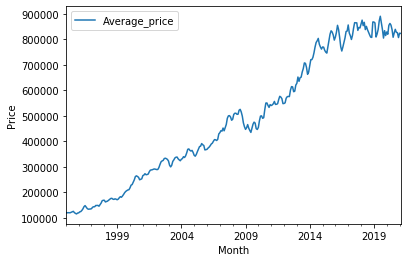

In [67]:
# First of all, make a variable called camden_prices, and assign it the result of filtering df on the following condition:
# df['London_Borough'] == 'Camden'
camden_prices = df[df['London_Borough'] == 'Camden']

# Make a variable called ax. Assign it the result of calling the plot() method, and plugging in the following values as parameters:
# kind ='line', x = 'Month', y='Average_price'
ax = camden_prices.plot(kind ='line', x = 'Month', y='Average_price')

# Finally, call the set_ylabel() method on ax, and set that label to the string: 'Price'. 
ax.set_ylabel('Price')


To limit the amount of temporal data-points you have, it would be useful to extract the year from every value in our Month column. 300 is more datapoints than you need.

To this end, you'll apply a lambda function. The logic works as follows. You'll:

look through the Month column
extract the year from each individual value in that column
store that corresponding year as separate column

In [69]:
df['Year'] = df['Month'].apply(lambda t: t.year)

# Call the tail() method on df
df.tail()

,London_Borough,ID,Month,Average_price,Year
15052,Sutton,E09000029,2021-02-01,4.164989e+05,2021
15053,Tower Hamlets,E09000030,2021-02-01,4.556330e+05,2021
15054,Waltham Forest,E09000031,2021-02-01,4.748478e+05,2021
15055,Wandsworth,E09000032,2021-02-01,6.172205e+05,2021
15056,Westminster,E09000033,2021-02-01,1.000560e+06,2021


In [70]:
# Using the function 'groupby' will help you to calculate the mean for each year and for each Borough. 
## As you can see, the variables Borough and Year are now indices
dfg = df.groupby(by=['London_Borough', 'Year']).mean()
dfg.sample(10)

Average_price
London_Borough       Year               
Croydon              2006  212111.336650
Tower Hamlets        2019  438287.409100
City of London       2015  760253.019233
Hillingdon           1997   85947.109168
                     2021  431341.061750
Hammersmith & Fulham 2017  756900.416383
Kingston upon Thames 2009  266774.216575
Brent                2009  264402.049200
Waltham Forest       2013  254265.265442
Westminster          1996  139188.760342

In [71]:
# Let's reset the index for our new DataFrame dfg, and call the head() method on it. 
dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


### 3. Modelling¶
Now comes the really exciting stuff.

You want to create a function that will calculate a ratio of house prices, that compares the price of a house in 2018 to the price in 1998.

Call this function create_price_ratio.

You want this function to:

Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].

Get the Average Price for that borough for 1998 and, seperately, for 2018.

Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.

Return that ratio.

In [72]:
# Here's where you should write your function:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y2018/y1998]
    return ratio


In [73]:
#  Test out the function by calling it with the following argument:
# dfg[dfg['London_Borough']=='Barking & Dagenham']
create_price_ratio(dfg[dfg['London_Borough']=='Barking & Dagenham'])

[4.89661861291754]

In [74]:
# We want to do this for all of the London Boroughs. 
# First, let's make an empty dictionary, called final, where we'll store our ratios for each unique London_Borough.
final = {}

In [75]:
# Now let's declare a for loop that will iterate through each of the unique elements of the 'London_Borough' column of our DataFrame dfg.
# Call the iterator variable 'b'. 
for b in dfg['London_Borough'].unique():
    # Let's make our parameter to our create_price_ratio function: i.e., we subset dfg on 'London_Borough' == b. 
    borough = dfg[dfg['London_Borough'] == b]
    # Make a new entry in the final dictionary whose value's the result of calling create_price_ratio with the argument: borough
    final[b] = create_price_ratio(borough)
# We use the function and incorporate that into a new key of the dictionary 
print(final) 

{'Barking & Dagenham': [4.89661861291754], 'Barnet': [4.358195917538044], 'Bexley': [4.248977046127877], 'Brent': [4.8945544971392865], 'Bromley': [4.0947846853338765], 'Camden': [4.935353408884261], 'City of London': [5.301620377587609], 'Croydon': [4.201100280024767], 'Ealing': [4.311450902121834], 'Enfield': [4.26347158349581], 'Greenwich': [4.763036347329193], 'Hackney': [6.198285561008662], 'Hammersmith & Fulham': [4.137798101936229], 'Haringey': [5.134624964136042], 'Harrow': [4.0591964329643195], 'Havering': [4.325230371335308], 'Hillingdon': [4.2002730803844575], 'Hounslow': [3.976409106143329], 'Islington': [4.844048012802298], 'Kensington & Chelsea': [5.082465066092464], 'Kingston upon Thames': [4.270549521484271], 'Lambeth': [4.957751163514063], 'Lewisham': [5.449221041059685], 'Merton': [4.741273313294604], 'Newham': [5.305390437201879], 'Redbridge': [4.471182006097364], 'Richmond upon Thames': [4.005161895721457], 'Southwark': [5.516485302379376], 'Sutton': [4.118522608573

In [78]:
# Make a variable called df_ratios, and assign it the result of calling the DataFrame method on the dictionary final. 
df_ratios = pd.DataFrame(final)

In [79]:
# Call the head() method on this variable to check it out. 
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,4.896619,4.358196,4.248977,4.894554,4.094785,4.935353,5.30162,4.2011,4.311451,4.263472,...,4.741273,5.30539,4.471182,4.005162,5.516485,4.118523,4.626701,5.834756,4.757709,5.353565


In [80]:
# All we need to do now is transpose it, and reset the index! 
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [81]:
# Let's just rename the 'index' column as 'London_Borough', and the '0' column to '2018'.
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [82]:
# Let's sort in descending order and select the top 15 boroughs.
# Make a variable called top15, and assign it the result of calling sort_values() on df_ratios. 
top15= df_ratios.sort_values(by='2018',ascending=False).head(15)
print(top15)

                 Borough      2018
11               Hackney  6.198286
30        Waltham Forest  5.834756
27             Southwark  5.516485
22              Lewisham  5.449221
32           Westminster  5.353565
24                Newham  5.305390
6         City of London  5.301620
13              Haringey  5.134625
19  Kensington & Chelsea  5.082465
21               Lambeth  4.957751
5                 Camden  4.935353
0     Barking & Dagenham  4.896619
3                  Brent  4.894554
18             Islington  4.844048
10             Greenwich  4.763036


[Text(0, 0, 'Hackney'),
 Text(0, 0, 'Waltham Forest'),
 Text(0, 0, 'Southwark'),
 Text(0, 0, 'Lewisham'),
 Text(0, 0, 'Westminster'),
 Text(0, 0, 'Newham'),
 Text(0, 0, 'City of London'),
 Text(0, 0, 'Haringey'),
 Text(0, 0, 'Kensington & Chelsea'),
 Text(0, 0, 'Lambeth'),
 Text(0, 0, 'Camden'),
 Text(0, 0, 'Barking & Dagenham'),
 Text(0, 0, 'Brent'),
 Text(0, 0, 'Islington'),
 Text(0, 0, 'Greenwich')]

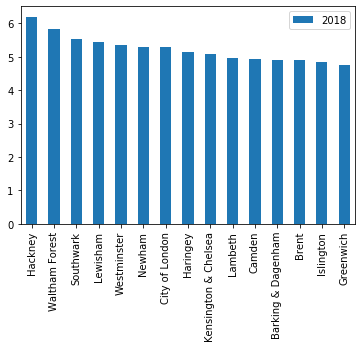

In [83]:
# Let's plot the boroughs that have seen the greatest changes in price.
# Make a variable called ax. Assign it the result of filtering top15 on 'Borough' and '2018', then calling plot(), with
# the parameter kind = 'bar'. 
ax = top15[['Borough','2018']].plot(kind='bar')

ax.set_xticklabels(top15.Borough)

### 4. Conclusion
Congratulation!  You're done. Excellent work.

What can you conclude? Type your conclusions below. 
Hackney has the highest increase in pricing in the past two decades.

We hope you enjoyed this practical project. 
It should have consolidated your data cleaning and pandas skills by looking at a real-world problem with the kind of dataset you might encounter as a budding data scientist. 